In [1]:
import numpy as np
import keras
import pandas
from keras_tqdm import TQDMNotebookCallback
from sklearn.preprocessing import StandardScaler

data = np.array(pandas.read_csv("./training_noavg.csv", header=0))
## Have to drop all the rows that have nan values because they will not help with net
## clean out rows with nan values
data = data[~np.isnan(data).any(axis=1)]
np.random.shuffle(data)

print(data.shape)


Using TensorFlow backend.


(1543, 9)


In [2]:
from sympy import *
init_printing(use_latex=True)

import matplotlib.pyplot as plt
%matplotlib inline

## we will use scaled data
scaler = StandardScaler()
## when testing predicitions
## X = scaler.fit_transform( X )
## test = scaler.transform( test )

X = data[:,0:8]
X = scaler.fit_transform(X)
print(X.shape)
display(X)

labels = data[:,8]
print(labels.shape)
display(labels)

Y = keras.utils.to_categorical(labels, len(np.unique(labels)))

(1543, 8)


array([[ 0.57228641, -0.76184435, -0.07055249, ...,  0.74520521,
         1.18529535, -0.61084339],
       [ 0.57228641, -1.97397657,  0.60005831, ...,  0.0617867 ,
         1.84507555,  0.4678146 ],
       [ 0.22061858,  0.45028787,  1.04713217, ..., -1.30505031,
        -1.45382546,  1.11500938],
       ...,
       [ 0.92395424,  0.45028787,  1.71774296, ..., -1.98846881,
        -0.46415516,  1.11500938],
       [-0.13104926,  1.1775672 ,  0.82359524, ..., -0.6216318 ,
        -1.78371556,  1.33074098],
       [ 0.22061858, -0.76184435,  0.15298445, ...,  0.74520521,
         0.85540524, -0.61084339]])

(1543,)


array([2., 2., 1., ..., 1., 1., 2.])

In [3]:
input_size = X.shape[1]
output_size = Y.shape[1]
display(X.shape[1])

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(64,input_dim=8,activation='relu', bias_initializer=keras.initializers.Constant(value=0.01)))
model.add(keras.layers.Dense(64,input_dim=8,activation='sigmoid', bias_initializer=keras.initializers.Constant(value=0.01)))

model.add(keras.layers.Dense(3,activation='softmax'))
#categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,931
Trainable params: 4,931
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
history = model.fit(X, Y,
    batch_size=56, 
    epochs=100, 
    verbose=0,
    callbacks=[TQDMNotebookCallback()],
    validation_split = 0.2)


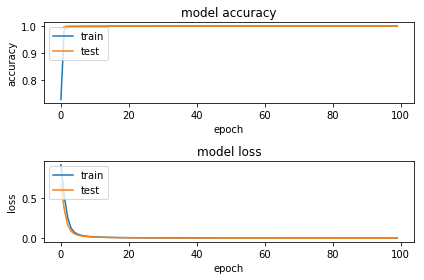

1543/1543 [==============================] - 1s 333us/step
Test loss: 0.000304120280864022
Test accuracy: 1.0


In [6]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [7]:
model.save_weights('MLN.weights')
model.save('MLN.model')

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
